In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [1]:
import pandas as pd
df = pd.read_csv('datasets/sales.csv')

In [2]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased,satisfied
0,15624510,Male,19,19000,0,no
1,15810944,Male,35,20000,0,no
2,15668575,Female,26,43000,0,no
3,15603246,Female,27,57000,0,no
4,15804002,Male,19,76000,0,no
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,yes
396,15706071,Male,51,23000,1,yes
397,15654296,Female,50,20000,1,yes
398,15755018,Male,36,33000,0,yes


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
textual_columns = ['Gender']  # replace with your actual textual column names
for col in textual_columns:
    df[col] = le.fit_transform(df[col])

In [4]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased',
       'satisfied '],
      dtype='object')

In [5]:
from sklearn.model_selection import train_test_split
X = df.drop('satisfied ', axis=1)  # replace 'target_column' with your actual target column name
y = df['satisfied ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [9]:
conf_mat = confusion_matrix(y_test, predictions)


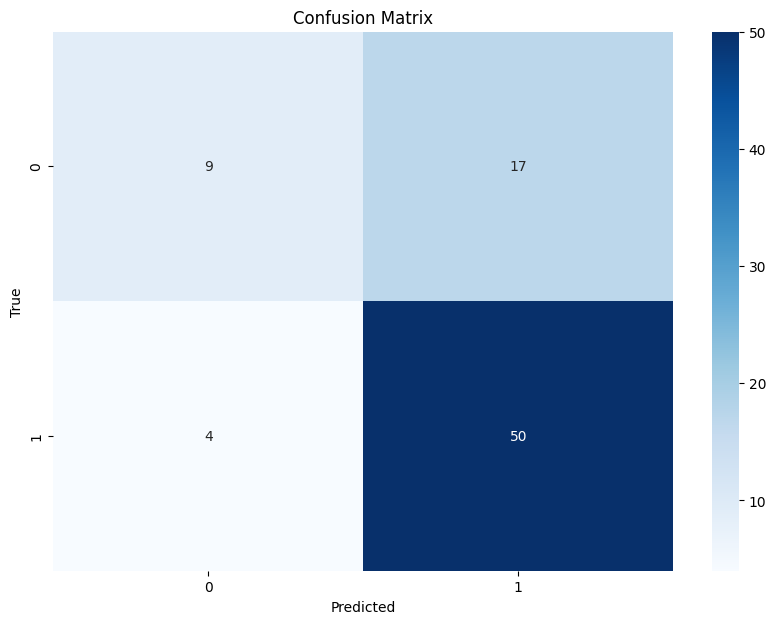

In [10]:
plt.figure(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()